               Name Description  \
0        Roslindale               
1     Jamaica Plain               
2      Mission Hill               
3          Longwood               
4       Bay Village               
5  Leather District               
6         Chinatown               
7         North End               
8           Roxbury               
9         South End               

                                            geometry  
0  MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...  
1  POLYGON ((-71.10499 42.32610, -71.10503 42.326...  
2  POLYGON ((-71.09043 42.33577, -71.09050 42.335...  
3  POLYGON ((-71.09811 42.33673, -71.09832 42.337...  
4  POLYGON ((-71.06663 42.34878, -71.06663 42.348...  
5  POLYGON ((-71.05838 42.34983, -71.05834 42.349...  
6  POLYGON ((-71.05791 42.35238, -71.05811 42.352...  
7  POLYGON ((-71.05200 42.36884, -71.05219 42.368...  
8  POLYGON ((-71.09646 42.29323, -71.09633 42.293...  
9  POLYGON ((-71.06834 42.34775, -71.06913 42.347...  


<Figure size 432x288 with 0 Axes>

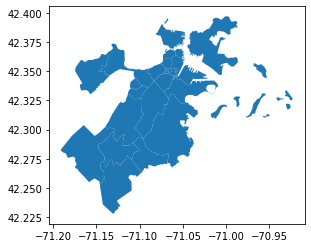

In [62]:
import shapely
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

def within_shape(df, shapes):
    in_shape = []
    for sh in shapes.geometry:
        within = df.within(sh)
        in_shape.append(within)
    return in_shape

plt.clf()

DATAFOLDER = "../../data/"

#gdf = geopandas.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods-shp/Boston_Neighborhoods.shp')
gdf = geopandas.read_file(DATAFOLDER + "shapefiles/Boston_Neighborhoods.kml", driver='KML')

print(gdf.head(10))#print(gdf[gdf.Name.eq("Beacon Hill")])
gdf.plot()
plt.show()

In [63]:
final_boston = pd.read_csv(DATAFOLDER + "boston-licenses/boston-licenses-clean.csv")
final_boston.LICCAT.unique()

array(['All Alc', 'All Alc Restr', 'Malt Wine'], dtype=object)

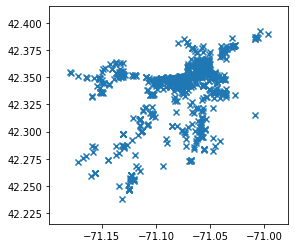

In [64]:

gdf2 = geopandas.GeoDataFrame(final_boston, geometry=geopandas.points_from_xy(final_boston.Long, final_boston.Lat))
gdf2.plot(marker="x")
plt.show()

           Name Description                                           geometry
14  Beacon Hill              POLYGON ((-71.07141 42.36119, -71.07308 42.361...
14    POLYGON ((-71.07141 42.36119, -71.07308 42.361...
Name: geometry, dtype: geometry
                                 BUSINESSNAME                 ISSDTTM  \
0                    SPEAK EASY CONCEPTS, LLC  11/27/2013 12:00:00 AM   
1                            FROST GROUP, LLC  11/20/2013 12:00:00 AM   
2                    EMANUEL ENTERPRISES, LLC  10/01/2013 12:00:00 AM   
3            ZAZ RESTAURANT & CATERING, CORP.  05/19/2015 12:00:00 AM   
4                 HOMESTEAD BAKERY & CAFE LLC  03/02/2016 12:00:00 AM   
5                             SUYA JOINT, LLC  09/18/2015 12:00:00 AM   
6                                         NaN  10/07/2015 12:00:00 AM   
7                         GOURMET CHINA, INC.  11/25/2013 12:00:00 AM   
8                             THE TWELVE BENS  11/29/2013 12:00:00 AM   
9                       

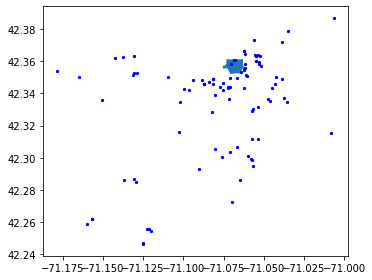

In [72]:
point = (-71.07136,42.35576)
point2 = (42.35576,-71.07136)

fig, ax = plt.subplots()

beacon_hill = gdf[gdf.Name.eq("Beacon Hill")]
print(beacon_hill)
beacon_hill.plot(ax=ax)

gdf2.head(100).plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

print(beacon_hill['geometry'])
new_point = shapely.geometry.Point(point)
beacon_hill.geometry.contains(new_point)
#new_point.within(beacon_hill['geometry'])
#shapely.geometry.shape(beacon_hill)
#print(gdf['geometry'])

gdf2['neighborhood'] = None
for index, row in gdf2.iterrows():
    for name in gdf['Name']:
        if gdf[gdf.Name.eq(name)].geometry.contains(row.geometry).bool():
            gdf2.at[index,'neighborhood'] = name
    #if index > 100:
    #    break
print(gdf2.head(100))

In [75]:
gdf2.groupby(["LICCAT"]).count()

,BUSINESSNAME,ISSDTTM,EXPDTTM,CAPACITY,STNO,Address,Location,Lat,Long,geometry,neighborhood
LICCAT,,,,,,,,,,,
All Alc,654,656,656,656,656,656,656,656,656,656,652
All Alc Restr,67,67,67,67,67,67,67,67,67,67,67
Malt Wine,158,160,160,160,160,160,160,160,160,160,159


In [68]:
# save as CSV
gdf2.to_csv(DATAFOLDER + "boston-licenses/boston-licenses-with-labels.csv", index = False)

In [51]:
boston_labeled = pd.read_csv(DATAFOLDER + "boston-licenses/boston-licenses-with-labels.csv")

In [52]:
boston_labeled

,BUSINESSNAME,ISSDTTM,EXPDTTM,LICCAT,LICCATDESC,CAPACITY,STNO,Address,Location,Lat,Long,geometry,neighborhood
0,"SPEAK EASY CONCEPTS, LLC",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,520,25,Boylston PL,"(42.351899, -71.065829)",42.316248,-71.102627,POINT (-71.10262693843245 42.31624823260227),Jamaica Plain
1,"FROST GROUP, LLC",11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,240,200,State ST,"(42.36003, -71.05319)",42.359488,-71.053154,POINT (-71.05315400000001 42.359488),Downtown
2,"EMANUEL ENTERPRISES, LLC",10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPMWL,GOP Malt Wine Liq.,49,71,Meridian St,"(42.37195, -71.0388)",42.371963,-71.038805,POINT (-71.03880522704439 42.37196255),East Boston
3,25 CHARLES ON THE HILL LLC,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,INNAL,Inn. All Alc.,0,19,Charles ST,"(42.356811, -71.069554)",42.356813,-71.069562,POINT (-71.06956223915162 42.35681295),Beacon Hill
4,"SUYA JOINT, LLC",09/18/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,84,185,Dudley ST,"(42.32832, -71.08196)",42.328465,-71.082149,POINT (-71.0821485 42.3284645),Roxbury
5,"GOURMET CHINA, INC.",11/25/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MW,CV7 Malt Wine,48,23,Tyler St,"(42.350769, -71.060935)",42.246234,-71.124994,POINT (-71.12499364722144 42.24623370000001),Hyde Park
6,THE TWELVE BENS,11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,285,315,Adams ST,"(42.298605, -71.057578)",42.298611,-71.057467,POINT (-71.057467 42.298611),Dorchester
7,"HLC GROUP ENTERPRISES, LLC",11/15/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,148,131,Dartmouth St,"(42.34682, -71.07543)",42.346710,-71.075396,POINT (-71.0753958 42.3467104),South End
8,"THE NEXT PLACE, LLC",11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,440,262,Friend ST,"(42.36457, -71.06144)",42.364652,-71.061379,POINT (-71.06137916326531 42.36465214285714),West End
9,"MASSACHUSETTS SPORTSERVICE, INC.",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,19058,100,Legends WY,"(42.36629, -71.0622)",42.366290,-71.062226,POINT (-71.06222575726521 42.36628985),West End


In [56]:
import pandas
import numpy as np
boston_licenses = pandas.read_csv(DATAFOLDER + "boston-licenses/boston-licenses-with-labels.csv")
boston_licenses.head(40)
boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','neighborhood'])['BUSINESSNAME'].count().reset_index().head(40)
boston_licenses[~boston_licenses.LICCAT.eq('CLBMWR')].groupby(['LICCAT','LICCATDESC'])['BUSINESSNAME'].count().reset_index().head(40)


boston_licenses[boston_licenses.LICCAT.eq('TAVAL')  ] # we are going to take these out as there are only 2 places in different neighborhoods
a = boston_licenses[~boston_licenses.LICCAT.eq('TAVAL')].LICCATDESC.str.split(expand = True,pat=' -')
a= a.assign(new_c = np.where(a[1].isnull(), a[0], a[1]))
#print(a)
new_a = a[0].str.rsplit(expand=True)
#new_a = new_a.rename(index={'Restrict.':np.nan},inplace=True)
a['ntype'] = new_a[[1,2,3,4]].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#print('A: ', a.ntype[4])
a = a.assign(final_type = np.where(a.ntype.eq('   '),a.new_c.str.strip(), a.ntype.str.strip()))

boston_licenses['ltype'] = a.final_type
#print(boston_licenses.index)
#boston_licenses = boston_licenses.replace('All Alc. Restrict.','All Alc.')

boston_licenses = boston_licenses.replace('Malt & Wine', 'Malt Wine')
boston_licenses = boston_licenses.replace('Prem All Alcohol Rest', 'All Alc. Restrict.')
boston_licenses.head(10)
#print(boston_licenses.head(10))
boston_licenses.groupby(['ltype','neighborhood'])['BUSINESSNAME'].count().reset_index()
#boston_licenses[boston_licenses.ltype == 'Prem All Alcohol Rest']



,ltype,neighborhood,BUSINESSNAME
0,All Alc.,Allston,12
1,All Alc.,Back Bay,48
2,All Alc.,Bay Village,4
3,All Alc.,Beacon Hill,7
4,All Alc.,Brighton,15
5,All Alc.,Charlestown,8
6,All Alc.,Chinatown,1
7,All Alc.,Dorchester,26
8,All Alc.,Downtown,75
9,All Alc.,East Boston,14


In [2]:
import pandas as pd
boston_licenses = pd.read_csv("/Users/tylerreece/Documents/GitHub/CS591-Project/data/boston-licenses/liquor_licenses_full.csv")

In [3]:
boston_licenses

,Unnamed: 0,BUSINESSNAME,ISSDTTM,EXPDTTM,LICCAT,LICCATDESC,CAPACITY,STNO,Address,Location,5,Final_Lat,Final_Long,geometry,neighborhood,ltype
0,0,NEW ENGLAND AQUARIUM CORP.,11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,2400,NaN,Central Wharf,"(0.0, 0.0)","-71.0508,42.358902",42.358902,-71.050800,POINT (-71.0508 42.358902),Downtown,All Alc.
1,1,"SPEAK EASY CONCEPTS, LLC",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,520,25.0,Boylston PL,"(42.351899, -71.065829)","-71.06593,42.35227",42.351899,-71.065829,POINT (-71.06582899999999 42.351899),Downtown,All Alc.
2,2,"FROST GROUP, LLC",11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,240,200.0,State ST,"(42.36003, -71.05319)","-71.05322,42.359398",42.360030,-71.053190,POINT (-71.05319 42.36003),Downtown,All Alc.
3,3,"EMANUEL ENTERPRISES, LLC",10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPMWL,GOP Malt Wine Liq.,49,71.0,Meridian St,"(42.37195, -71.0388)","-71.03901,42.371914",42.371950,-71.038800,POINT (-71.03879999999999 42.37195),East Boston,Malt Wine Liq.
4,4,25 CHARLES ON THE HILL LLC,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,INNAL,Inn. All Alc.,0,19.0,Charles ST,"(42.356811, -71.069554)","-71.069664,42.356735",42.356811,-71.069554,POINT (-71.069554 42.356811),Beacon Hill,All Alc.
5,5,"ZAZ RESTAURANT & CATERING, CORP.",05/19/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MWR,CV7 Malt Wine Restrict.,19,1238.0,River St,"(0.0, 0.0)","-71.122665,42.255974",42.255974,-71.122665,POINT (-71.122665 42.255974),Hyde Park,Malt Wine Restrict.
6,6,HOMESTEAD BAKERY & CAFE LLC,03/02/2016 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,31,1448.0,Dorchester Av,"(0.0, 0.0)","-71.05988,42.30123",42.301230,-71.059880,POINT (-71.05988000000001 42.30123),Dorchester,Neighborhood Restricted - CV7ALN
7,7,"SUYA JOINT, LLC",09/18/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,84,185.0,Dudley ST,"(42.32832, -71.08196)","-71.08214,42.32854",42.328320,-71.081960,POINT (-71.08196 42.32832),Roxbury,Neighborhood Restricted - CV7ALN
8,8,NaN,10/07/2015 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,263,0.0,Thompson Island,"(0.0, 0.0)",NaN,NaN,NaN,POINT (nan nan),Harbor Islands,All Alc.
9,9,"GOURMET CHINA, INC.",11/25/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MW,CV7 Malt Wine,48,23.0,Tyler St,"(42.350769, -71.060935)","-71.06076,42.35064",42.350769,-71.060935,POINT (-71.060935 42.350769),Chinatown,Malt Wine


In [4]:
boston_licenses["color"] = None

In [5]:
for i in boston_licenses["ltype"].unique():
    print(i)

All Alc.
Malt Wine Liq.
Malt Wine Restrict.
Neighborhood Restricted - CV7ALN
Malt Wine
Malt Wine Liq. Restrict.
Neighborhood Restricted - CV7MWN
Neighborhood Restricted - CV7MWLN
All Alc. Restrict.


In [7]:
boston_licenses.loc[boston_licenses["ltype"].str.contains("Malt"), "ltype"] = "MW"

In [10]:
boston_licenses.loc[boston_licenses["ltype"].str.contains("Rest"), "ltype"] = "All Alc."

In [20]:
boston_licenses.to_csv("/Users/tylerreece/Documents/GitHub/CS591-Project/data/boston-licenses/boston_licenses_for_plot.csv")
boston_licenses

,Unnamed: 0,BUSINESSNAME,ISSDTTM,EXPDTTM,LICCAT,LICCATDESC,CAPACITY,STNO,Address,Location,5,Final_Lat,Final_Long,geometry,neighborhood,ltype,color
0,0,NEW ENGLAND AQUARIUM CORP.,11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,2400,NaN,Central Wharf,"(0.0, 0.0)","-71.0508,42.358902",42.358902,-71.050800,POINT (-71.0508 42.358902),Downtown,All Alc.,None
1,1,"SPEAK EASY CONCEPTS, LLC",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,520,25.0,Boylston PL,"(42.351899, -71.065829)","-71.06593,42.35227",42.351899,-71.065829,POINT (-71.06582899999999 42.351899),Downtown,All Alc.,None
2,2,"FROST GROUP, LLC",11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,240,200.0,State ST,"(42.36003, -71.05319)","-71.05322,42.359398",42.360030,-71.053190,POINT (-71.05319 42.36003),Downtown,All Alc.,None
3,3,"EMANUEL ENTERPRISES, LLC",10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPMWL,GOP Malt Wine Liq.,49,71.0,Meridian St,"(42.37195, -71.0388)","-71.03901,42.371914",42.371950,-71.038800,POINT (-71.03879999999999 42.37195),East Boston,MW,None
4,4,25 CHARLES ON THE HILL LLC,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,INNAL,Inn. All Alc.,0,19.0,Charles ST,"(42.356811, -71.069554)","-71.069664,42.356735",42.356811,-71.069554,POINT (-71.069554 42.356811),Beacon Hill,All Alc.,None
5,5,"ZAZ RESTAURANT & CATERING, CORP.",05/19/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MWR,CV7 Malt Wine Restrict.,19,1238.0,River St,"(0.0, 0.0)","-71.122665,42.255974",42.255974,-71.122665,POINT (-71.122665 42.255974),Hyde Park,MW,None
6,6,HOMESTEAD BAKERY & CAFE LLC,03/02/2016 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,31,1448.0,Dorchester Av,"(0.0, 0.0)","-71.05988,42.30123",42.301230,-71.059880,POINT (-71.05988000000001 42.30123),Dorchester,All Alc.,None
7,7,"SUYA JOINT, LLC",09/18/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,84,185.0,Dudley ST,"(42.32832, -71.08196)","-71.08214,42.32854",42.328320,-71.081960,POINT (-71.08196 42.32832),Roxbury,All Alc.,None
8,8,NaN,10/07/2015 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,263,0.0,Thompson Island,"(0.0, 0.0)",NaN,NaN,NaN,POINT (nan nan),Harbor Islands,All Alc.,None
9,9,"GOURMET CHINA, INC.",11/25/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MW,CV7 Malt Wine,48,23.0,Tyler St,"(42.350769, -71.060935)","-71.06076,42.35064",42.350769,-71.060935,POINT (-71.060935 42.350769),Chinatown,MW,None


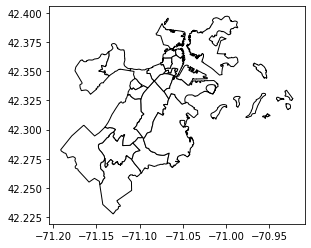

In [33]:
import shapely
import geopandas as gpd
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


DATAFOLDER = "/Users/tylerreece/Documents/GitHub/CS591-Project/data/"
gdf = geopandas.read_file(DATAFOLDER + "shapefiles/Boston_Neighborhoods.kml", driver='KML')
ax = gdf.plot(color="white", edgecolor="black")
final_boston = pd.read_csv("/Users/tylerreece/Documents/GitHub/CS591-Project/data/boston-licenses/boston_licenses_for_plot.csv")


final_boston.loc[final_boston["ltype"] == "All Alc.", "color"] = "green"
final_boston.loc[final_boston["ltype"] == "MW", "color"] = "red"


ValueError: Invalid RGBA argument: masked

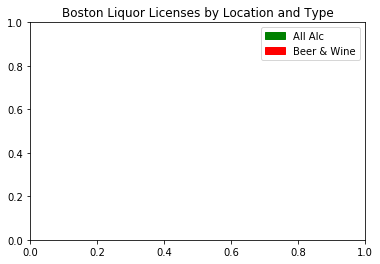

In [34]:
gdf2 = geopandas.GeoDataFrame(final_boston, geometry=geopandas.points_from_xy(final_boston.Final_Long, final_boston.Final_Lat))
red_x = matplotlib.patches.Patch(color='red', label='Beer & Wine')
green_x = matplotlib.patches.Patch(color='green', label='All Alc')
plt.legend(handles=[green_x, red_x])
plt.title("Boston Liquor Licenses by Location and Type")
gdf2.plot(marker=".",ax=ax, color = gdf2.color, markersize = 8)